In [314]:
import pandas as pd

In [316]:
import os
os.getcwd()

'/Users/oreo'

In [318]:
teams = pd.read_csv("teams.csv")
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [320]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [322]:
teams.isna().sum()

team               0
country            0
year               0
events             0
athletes           0
age                0
height             0
weight             0
medals             0
prev_medals      130
prev_3_medals    130
dtype: int64

In [324]:
teams = teams[['team','country','year','athletes','age','prev_medals','medals']]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [326]:
#Correlation between the medals column and other columns to check strong correlations when building the linear model
teams.drop(columns=['team','country']).corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [328]:
import seaborn as sns

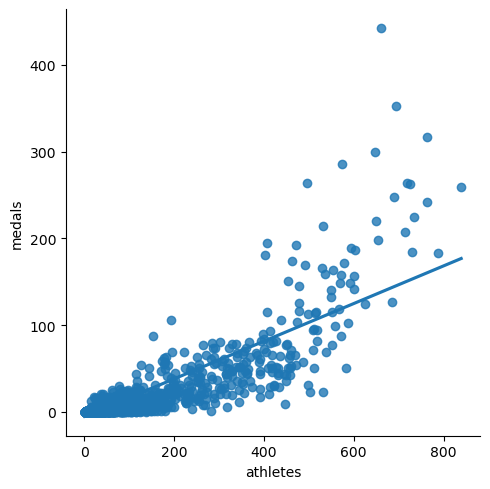

In [330]:
sns.lmplot(x='athletes',y='medals',fit_reg=True,ci=None,data=teams);

<Axes: ylabel='Frequency'>

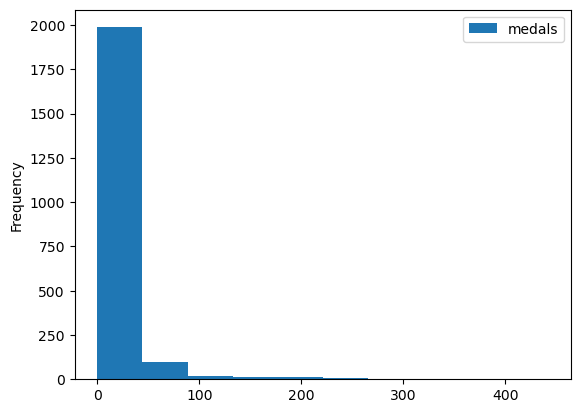

In [332]:
teams.plot.hist(y="medals")

In [334]:
teams.isna().sum()

team             0
country          0
year             0
athletes         0
age              0
prev_medals    130
medals           0
dtype: int64

In [336]:
teams = teams.dropna()

In [338]:
teams.isna().sum()

team           0
country        0
year           0
athletes       0
age            0
prev_medals    0
medals         0
dtype: int64

In [340]:
#Building the model

In [342]:
train = teams[teams['year']<2012].copy()
test = teams[teams['year']>=2012].copy()

In [344]:
train.shape

(1609, 7)

In [346]:
test.shape

(405, 7)

In [348]:
from sklearn.linear_model import LinearRegression

In [350]:
lreg = LinearRegression()

In [352]:
lreg

LinearRegression()

In [354]:
predictors = ["athletes","prev_medals"]
target = ["medals"]

In [356]:
lreg.fit(X=train[predictors],y=train[target])

LinearRegression()

In [358]:
predictions = lreg.predict(X=test[predictors])

In [360]:
predictions

array([[-9.61221245e-01],
       [-1.17633261e+00],
       [-1.42503158e+00],
       [-1.71184673e+00],
       [ 2.15562926e+00],
       [ 3.91463636e+00],
       [-1.71184673e+00],
       [-1.85525431e+00],
       [ 3.67563128e-01],
       [-2.77770967e-01],
       [-1.85525431e+00],
       [-1.49673537e+00],
       [ 4.67519911e+01],
       [ 2.87550937e+01],
       [ 4.58450091e+00],
       [ 2.54773581e+00],
       [-1.85525431e+00],
       [-1.64014295e+00],
       [-1.85525431e+00],
       [-1.85525431e+00],
       [ 1.46556876e+02],
       [ 1.20571799e+02],
       [ 6.56314795e+00],
       [ 3.95275254e+00],
       [ 7.34283247e+00],
       [ 1.03117468e+01],
       [ 5.19171882e+00],
       [ 3.58517645e+00],
       [-1.64014295e+00],
       [-1.64014295e+00],
       [-1.56843916e+00],
       [-1.20992022e+00],
       [-1.71184673e+00],
       [-1.42503158e+00],
       [ 1.17929959e+01],
       [ 1.00049298e+01],
       [-1.78355052e+00],
       [-1.71184673e+00],
       [-1.5

In [362]:
test['predictions'] = predictions

In [364]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [366]:
test.loc[test['predictions']<0,'predictions']=0

In [368]:
test['predictions']=test['predictions'].round()

In [370]:
test.isna().sum()

team           0
country        0
year           0
athletes       0
age            0
prev_medals    0
medals         0
predictions    0
dtype: int64

In [372]:
#measuring prediction error with the aid of the mean absolute error metrics

In [374]:
from sklearn.metrics import mean_absolute_error

In [376]:
error = mean_absolute_error(y_true=test['medals'],y_pred=test['predictions'])
error

3.2987654320987656

In [378]:
#An error value of 3.2987....... was gotten,what this means is that on Avg, the model's 
#predictions is 3.3 medals of how many medals a team actually won in the olympics. #but how much can this evaluation be trusted?

In [380]:
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [382]:
#From the above description of the teams data based of the medals column which returned a S.D of 33.627?
#Yes the error evaluation can be well trusted because error value < standard deviation

In [384]:
#But how good is this model?

In [386]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [388]:
test[test['team']=='IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [390]:
#evaluating the errors on a country by country basis

In [392]:
errors = (test['medals']-test['predictions']).abs()
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [394]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [396]:
error_by_team = errors.groupby(by=test['team']).mean()
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [398]:
medals_by_team = test['medals'].groupby(by=test['team']).mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [400]:
import numpy as np
error_ratio = error_by_team/medals_by_team
error_ratio[~pd.isnull(error_ratio)]
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [402]:
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

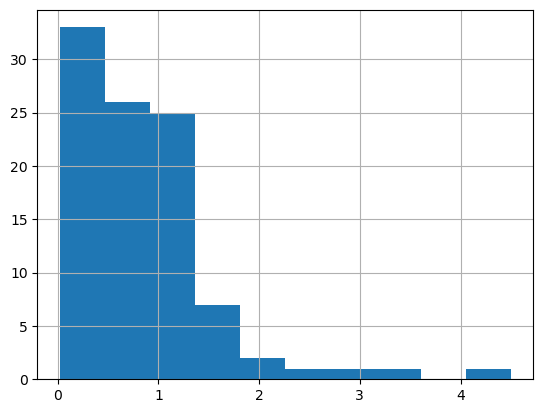

In [409]:
error_ratio.hist();

In [411]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

In [ ]:
#The answer is Yes,the model performs pretty well based on teams/countries represented at the olympics